In [1]:
#Script for processing SWIFT Wave data

from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import netcdf
import os
import datetime


from src.em_apex_processing import *
from src.spectral_processing import *

fname = "/Users/jamesstadler/Documents/UW/TFO/Data/LCDRI/SWIFT/SWIFT12_01Apr2017.mat"

SWIFT = loadmat(fname)

In [2]:
swift = np.transpose(SWIFT['SWIFT'])
mdtype = swift.dtype
ndata = {n: swift[n] for n in mdtype.names}
columns = [n for (n, v) in ndata.items()]
df = pd.DataFrame(np.concatenate([ndata[c] for c in columns], axis=1, dtype='object'), columns=columns)
df['lat']=np.array(df['lat'], dtype=float)
df['lon']=np.array(df['lon'], dtype=float)
df['sigwaveheight']=np.array(df['sigwaveheight'], dtype=float)
df['time']=np.array(df['time'], dtype=float)



In [3]:
#Process datetimes
dates = datenum_to_datetime(df['time'])
# Get just a single day (e.g. april 4th)
apr4_inds = [dates[i].day==4 for i in range(len(dates))]
dates[apr4_inds]

array([datetime.datetime(2017, 4, 4, 0, 0),
       datetime.datetime(2017, 4, 4, 0, 11, 59),
       datetime.datetime(2017, 4, 4, 0, 24),
       datetime.datetime(2017, 4, 4, 0, 36),
       datetime.datetime(2017, 4, 4, 0, 47, 59),
       datetime.datetime(2017, 4, 4, 0, 59, 59),
       datetime.datetime(2017, 4, 4, 1, 12),
       datetime.datetime(2017, 4, 4, 1, 24),
       datetime.datetime(2017, 4, 4, 2, 35, 59),
       datetime.datetime(2017, 4, 4, 2, 48),
       datetime.datetime(2017, 4, 4, 3, 0),
       datetime.datetime(2017, 4, 4, 3, 11, 59),
       datetime.datetime(2017, 4, 4, 3, 24),
       datetime.datetime(2017, 4, 4, 3, 36),
       datetime.datetime(2017, 4, 4, 3, 47, 59),
       datetime.datetime(2017, 4, 4, 3, 59, 59),
       datetime.datetime(2017, 4, 4, 4, 12),
       datetime.datetime(2017, 4, 4, 4, 24),
       datetime.datetime(2017, 4, 4, 4, 35, 59),
       datetime.datetime(2017, 4, 4, 4, 47, 59),
       datetime.datetime(2017, 4, 4, 5, 0),
       datetime.dateti

In [4]:
#Load Bathymetry
bath_fname = '/Users/jamesstadler/Documents/UW/TFO/Data/LCDRI/gebco_2022_SoCal.nc'
nc = netcdf.NetCDFFile(bath_fname, 'r', mmap=False) #Not sure why I need to do mmap = False but it gets rid of a warning
bath_lat= nc.variables['lat'][:]
bath_lon = nc.variables['lon'][:]
bath_z = nc.variables['tid'][:]


KeyError: 'tid'

In [5]:
plt.contourf(bath_lon, bath_lat, bath_z)
cm = plt.cm.get_cmap('viridis')
plt.scatter(df['lon'][apr4_inds], df['lat'][apr4_inds], c=df['sigwaveheight'][apr4_inds], cmap=cm)
plt.xlim([-119.5, -118.0])
plt.ylim([33.0, 34.0])
plt.colorbar()

NameError: name 'bath_z' is not defined

In [6]:
plt.scatter(df['lon'][apr4_inds], df['lat'][apr4_inds], c=df['sigwaveheight'][apr4_inds], cmap=cm)
plt.colorbar()


plt.scatter(df['lon'][apr4_inds].iloc[60], df['lat'][apr4_inds].iloc[60], color='k')

plt.figure()
plt.plot(df['sigwaveheight'][apr4_inds])

NameError: name 'cm' is not defined

In [18]:
def datenum_to_datetime(datenum_arr):
    """
    Convert Matlab datenum into Python datetime.
    :param datenum: Date in datenum format
    :return:        Datetime object corresponding to datenum.
    """
    #If its a pandas array loop through and do each elments
    dt_out = np.empty(len(datenum_arr), dtype=object)
    for n in range(len(datenum_arr)):
        datenum = datenum_arr[n]
        days = datenum % 1
        hours = days % 1 * 24
        minutes = hours % 1 * 60
        seconds = minutes % 1 * 60
        dtime = datetime.datetime.fromordinal(int(datenum)) \
               + datetime.timedelta(days=int(days)) \
               + datetime.timedelta(hours=int(hours)) \
               + datetime.timedelta(minutes=int(minutes)) \
               + datetime.timedelta(seconds=int(seconds)) \
               - datetime.timedelta(days=366)
        dt_out[n] = dtime
    return dt_out

In [8]:
days = time_test % 1
hours = days % 1 * 24
minutes = hours % 1 * 60
seconds = minutes % 1 * 60
dtime = datetime.datetime.fromordinal(int(time_test)) + datetime.timedelta(days=time_test%1) - datetime.timedelta(days = 366) 

NameError: name 'time_test' is not defined

In [9]:
dtime

NameError: name 'dtime' is not defined

In [159]:
time_test

736787.3083333333

In [175]:
len(df['time'])

468

In [225]:
df['lon'][apr4_inds].iloc[0]

-118.78827667236328

In [10]:
#Try loading the old swift dataset and then loading the newer swift dataset and see how different they look.\


swift_folder = "/Users/jamesstadler/Documents/UW/TFO/Data/LCDRI/SWIFT/SWIFTprocessed/"

files = os.listdir(swift_folder)
swift_loc_storer = {}
swift_arr = np.array([[0,0,0,0]])

for file in files:
    lat_arr = np.array([])
    lon_arr = np.array([])
    swift_fname = swift_folder+file
    name_tag = swift_fname.split('.')[0]
    SWIFT = loadmat(swift_fname)

    swift = np.transpose(SWIFT['SWIFT'])
    if swift.size==0:
        continue
    else:
        mdtype = swift.dtype
        ndata = {n: swift[n] for n in mdtype.names}
        columns = [n for (n, v) in ndata.items()]
        df = pd.DataFrame(np.concatenate([ndata[c] for c in columns], axis=1, dtype='object'), columns=columns)
        lat=np.array(df['lat'], dtype=float)
        lon=np.array(df['lon'], dtype=float)
        time = np.array(df['time'], dtype=float)
        hs = np.array(df['sigwaveheight'], dtype=float)
        lat_arr = np.expand_dims(lat, axis=1)
        lon_arr = np.expand_dims(lon, axis=1)
        time_arr = np.expand_dims(time, axis=1)
        hs_arr = np.expand_dims(hs, axis=1)

        swift_temp_arr = np.hstack((time_arr, lon_arr, lat_arr, hs_arr))
        swift_arr = np.vstack((swift_arr, swift_temp_arr))
    

swift_arr = np.delete(swift_arr, 0, 0)

In [11]:
all_swift_file = "/Users/jamesstadler/Documents/UW/TFO/Data/LCDRI/SWIFT/testswiftnew.mat"

SWIFT_new = loadmat(all_swift_file)

In [12]:
swift_arr2 = np.array([[0,0,0,0]])
for i in range(len(SWIFT_new['swift'][0, 0])):
    lat_arr = np.array([])
    lon_arr = np.array([])
    swift_temp = SWIFT_new['swift'][0, 0][i]
    #time = swift_temp[0, 0][0][0]
    #lon = swift_temp[0, 0][1][0]
    #lat = swift_temp[0, 0][2][0]
    #wavesigH = swift_temp[0, 0][9][0]
    mdtype = swift_temp.dtype
    ndata = {n: swift_temp[n] for n in mdtype.names}
    columns = [n for (n, v) in ndata.items()]
    df = pd.DataFrame(np.concatenate([ndata[c] for c in columns], axis=1, dtype='object'), columns=columns)
    lat=np.array(df['lat'][0], dtype=float).T
    lon=np.array(df['lon'][0], dtype=float).T
    time = np.array(df['time'][0], dtype=float).T
    hs = np.array(df['wavesigH'][0], dtype=float).T
    #lat_arr = np.expand_dims(lat, axis=1)
    #lon_arr = np.expand_dims(lon, axis=1)
    #time_arr = np.expand_dims(time, axis=1)
    #hs_arr = np.expand_dims(hs, axis=1)

    swift_temp_arr = np.hstack((time, lon, lat, hs))
    swift_arr2 = np.vstack((swift_arr2, swift_temp_arr))

swift_arr2 = np.delete(swift_arr2, 0, 0)

swift_arr2=swift_arr2[swift_arr2[:, 0].argsort()]
swift_arr = swift_arr[swift_arr[:, 0].argsort()]

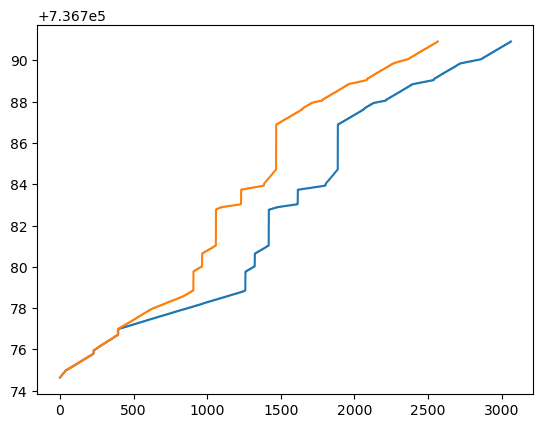

In [13]:
plt.plot(swift_arr[:, 0])
plt.plot(swift_arr2[:, 0])

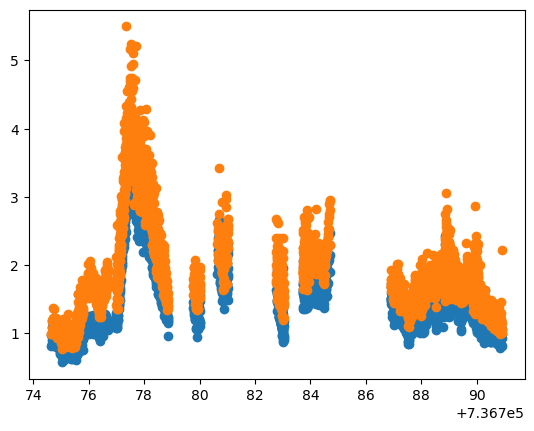

In [14]:
plt.scatter(swift_arr2[:, 0], swift_arr2[:, 3])
plt.scatter(swift_arr[:, 0], swift_arr[:, 3])





In [15]:
fname = "/Users/jamesstadler/Documents/UW/TFO/Data/LCDRI/229p1_d01.nc"

nc = netcdf.NetCDFFile(fname, 'r', mmap=False) #Not sure why I need to do mmap = False but it gets rid of a warning
times = nc.variables['waveTime'][:]
ts = np.array([datetime.datetime.fromtimestamp(t) for t in times])
Hs_cdip = nc.variables['waveHs'][:]
energy_density = nc.variables['waveEnergyDensity'][:]
wave_freq = nc.variables['waveFrequency'][:]
cdip_lat = np.nanmean(nc.variables['gpsLatitude'][:])
cdip_lon = np.nanmean(nc.variables['gpsLongitude'][:])

#dtimes = datetime(time, 'convertfrom', 'posixtime');
nc.close()

In [32]:
swift_t_out=datenum_to_datetime(swift_arr2[:, 0])
cdip_swift_inds = np.array([], dtype=int)
for ind in range(len(swift_arr2[:, 0])):
    cdip_ind = np.where(np.abs(swift_t_out[ind]-ts)<d==np.min(np.abs(swift_t_out[ind]-ts)))[0][0]
    cdip_swift_inds = np.append(cdip_swift_inds, cdip_ind)
    
#Now bin everything within 15min on either side of each of these cdip measurements:
# First get all the unique cdip times from the list which might have duplicates.

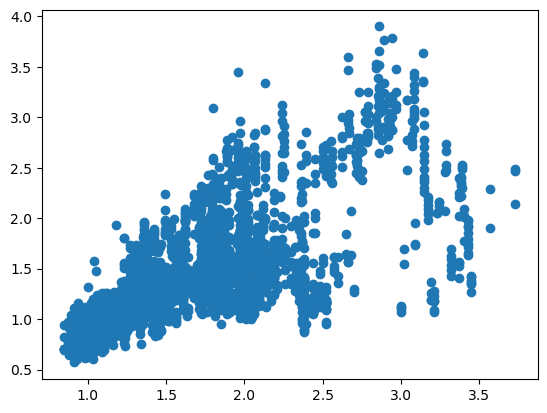

In [33]:
plt.scatter(Hs_cdip[cdip_swift_inds],swift_arr2[:, -1] )

In [31]:
cdip_swift_inds

array([105., 105., 105., ..., 885., 885., 886.])

In [19]:
swift_t_out=datenum_to_datetime([736775.958333333])

In [34]:
cdip_ind

886

In [42]:
np.min(np.abs(swift_t_out[ind]-ts))

True

In [41]:
datetime.timedelta(hours=1)

datetime.timedelta(seconds=3600)

In [43]:
swift_arr2[2 ,0]-swift_arr2[1, 0]

0.008333333302289248

In [44]:
swift_t_out[2]-swift_t_out[1]

datetime.timedelta(seconds=719)

In [46]:
len(ts[cdip_swift_inds])

2568

In [57]:
temp_cdip = cdip_swift_inds
new_temp = [*set(temp_cdip)]

In [58]:
len(new_temp)

468

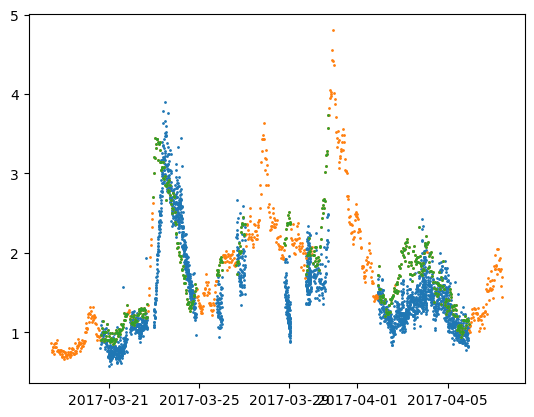

In [65]:
plt.scatter(swift_t_out, swift_arr2[:, 3], s=1)
plt.scatter(ts, Hs_cdip, s=1)
plt.scatter(ts[new_temp], Hs_cdip[new_temp], s=1)



In [56]:
new_temp

[datetime.datetime(2017, 3, 24, 10, 3, 45),
 datetime.datetime(2017, 4, 3, 12, 33, 45),
 datetime.datetime(2017, 3, 23, 0, 33, 45),
 datetime.datetime(2017, 4, 4, 1, 33, 45),
 datetime.datetime(2017, 3, 26, 16, 3, 45),
 datetime.datetime(2017, 4, 5, 12, 3, 45),
 datetime.datetime(2017, 3, 21, 19, 3, 45),
 datetime.datetime(2017, 4, 2, 12, 33, 45),
 datetime.datetime(2017, 4, 2, 22, 3, 45),
 datetime.datetime(2017, 3, 20, 17, 3, 45),
 datetime.datetime(2017, 3, 22, 6, 33, 45),
 datetime.datetime(2017, 4, 4, 7, 3, 45),
 datetime.datetime(2017, 3, 25, 19, 33, 45),
 datetime.datetime(2017, 3, 29, 18, 33, 45),
 datetime.datetime(2017, 3, 30, 5, 3, 45),
 datetime.datetime(2017, 3, 30, 11, 33, 45),
 datetime.datetime(2017, 3, 22, 5, 3, 45),
 datetime.datetime(2017, 3, 20, 16, 3, 45),
 datetime.datetime(2017, 3, 28, 21, 3, 45),
 datetime.datetime(2017, 3, 22, 14, 3, 45),
 datetime.datetime(2017, 4, 4, 19, 3, 45),
 datetime.datetime(2017, 3, 26, 23, 3, 45),
 datetime.datetime(2017, 3, 20, 22, 3